In [43]:
import requests
from IPython.display import Markdown, display


# Chat endpoint (OpenAI-compatible)
url = "http://134.185.93.70:8080/v1/chat/completions"

## List of questions
# question = "Mengapa saya tidak dianjurkan untuk meminum allopurinol ketika merasakan sakit karena asam urat?"
question = "Apa perbedaan klinis antara gagal jantung sistolik dan diastolik?"
# question = "Bagaimana mekanisme kerja obat SGLT2 inhibitor pada pasien dengan gagal jantung?"


# Chat-style prompt
messages = [
    {"role": "system", "content": "Kamu adalah asisten pintar medis. Jawab pertanyaan yang diberikan dengan jawaban yang akurat, padat, dan jelas!"},
    {"role": "user", "content": question}
]

# Payload formatted for OpenAI-style chat API
payload = {
    "model": "medgemma-4b-it-GGUF:Q4_1_L",
    "messages": messages,
    "temperature": 0.4,
    "max_tokens": 512,
    "stream": False
}

# Send POST request
response = requests.post(url, json=payload)
response.raise_for_status()
result = response.json()

chat_response = result["choices"][0]["message"]["content"]

# Display with Markdown rendering
display(Markdown(f"🧠 **Chat Response:**\n\n{chat_response}"))

🧠 **Chat Response:**

Perbedaan klinis utama antara gagal jantung sistolik dan diastolik adalah:

*   **Gagal Jantung Sistolik (HJS):**
    *   **Penyebab:** Kelemahan otot jantung (miokardium) yang menyebabkan jantung tidak dapat memompa darah secara efektif.
    *   **Gejala:** Sesak napas, kelelahan, pembengkakan (edema) pada kaki dan pergelangan kaki, sesak dada (angina), dan detak jantung yang tidak teratur.
    *   **Pemeriksaan Fisik:** Edema perifer, bunyi jantung yang abnormal (misalnya, galop), dan tanda-tanda kelebihan cairan.

*   **Gagal Jantung Diastolik (GJD):**
    *   **Penyebab:** Kelemahan katup jantung (biasanya katup mitral atau trikuspid) atau dinding jantung yang tebal, yang menyebabkan jantung tidak dapat mengembang dengan baik dan mengisi dengan darah secara efektif.
    *   **Gejala:** Sesak napas, kelelahan, dan pembengkakan (edema) pada kaki dan pergelangan kaki.
    *   **Pemeriksaan Fisik:** Bunyi jantung yang abnormal (misalnya, murmur), dan tanda-tanda kelebihan cairan.

Singkatnya, HJS adalah masalah dengan kemampuan jantung untuk berkontraksi, sedangkan GJD adalah masalah dengan kemampuan jantung untuk mengembang.


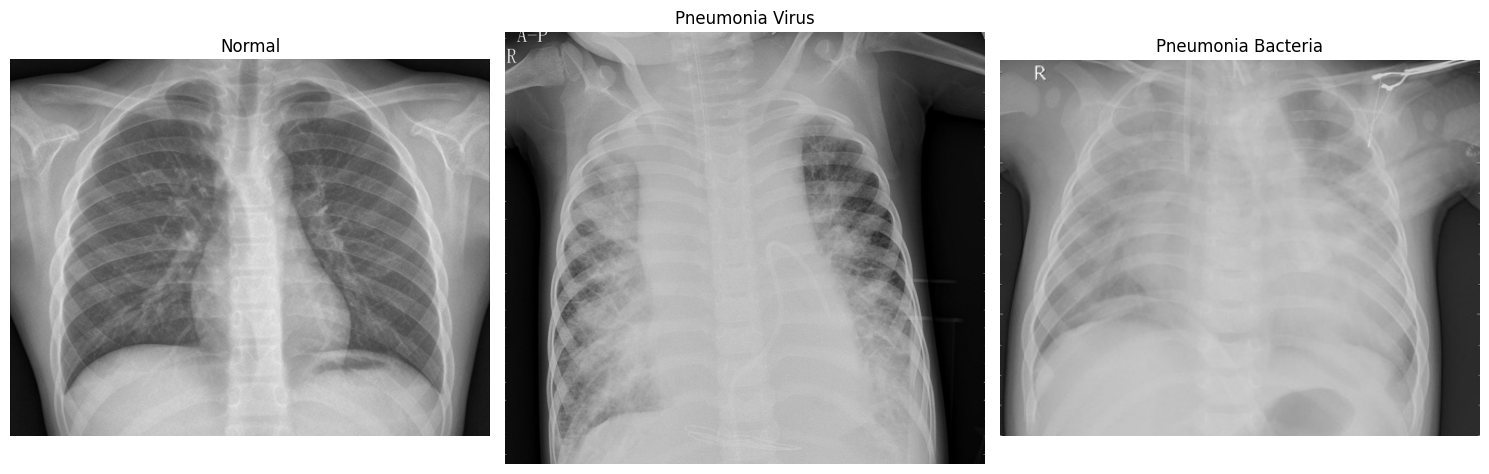

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image titles and paths
image_info = [
    ("Normal", "./normal.jpg"),
    ("Pneumonia Virus", "./pneumonia_virus.jpg"),
    ("Pneumonia Bacteria", "./pneumonia_bacteria.jpg")
]

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through images and plot them
for ax, (title, path) in zip(axes, image_info):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')  # Hide axis ticks

plt.tight_layout()
plt.show()

In [40]:
import requests
import base64
from IPython.display import Markdown, display
from pathlib import Path

# Chat endpoint (OpenAI-compatible)
url = "http://134.185.93.70:8080/v1/chat/completions"

# Path to your image
# image_path = "normal.jpg"
# image_path = "pneumonia_virus.jpg"
image_path = "pneumonia_bacteria.jpg"

# Read and encode the image to base64
with open(image_path, "rb") as f:
    image_bytes = f.read()
    image_base64 = base64.b64encode(image_bytes).decode("utf-8")

# Question to be asked
question = "Apa diagnosis kemungkinan gambar scan paru-paru yang diberikan?"

# Construct messages (OpenAI format, multimodal style)
system_message = """
Kamu adalah asisten pintar medis.
Analisis gambar dan jawab pertanyaan medis secara akurat!.
Tidak perlu menyertakan disclaimer.
"""
messages = [
    {
        "role": "system",
        "content": system_message,
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": question},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"}}
        ]
    }
]

# Payload for OpenAI-compatible chat with image
payload = {
    "model": "medgemma-4b-it-GGUF:Q4_1_L",
    "messages": messages,
    "temperature": 0.4,
    "max_tokens": 512,
    "stream": False
}

# Send the request
response = requests.post(url, json=payload)
response.raise_for_status()
result = response.json()

# Get and display the response
chat_response = result["choices"][0]["message"]["content"]
display(Markdown(f"🧠 **Chat Response:**\n\n{chat_response}"))

🧠 **Chat Response:**

Berdasarkan gambar yang diberikan, kemungkinan diagnosisnya adalah **pneumonia**.

Alasan:

*   **Opasitas pada paru-paru:** Tampak adanya area yang lebih gelap (opas) pada kedua paru-paru, yang bisa mengindikasikan adanya infiltrat atau cairan di dalam paru-paru.
*   **Tidak ada konsolidasi yang jelas:** Meskipun ada opasitas, tidak ada konsolidasi yang jelas yang menunjukkan adanya infeksi yang tertutup.
*   **Kondisi umum:** Gambaran ini menunjukkan adanya kondisi yang mempengaruhi paru-paru, yang bisa disebabkan oleh infeksi, peradangan, atau kondisi lainnya.

Namun, diagnosis yang tepat memerlukan informasi tambahan, seperti riwayat medis pasien, pemeriksaan fisik, dan hasil tes laboratorium.
